In [1]:
# Loading of packages

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier, XGBRegressor
from math import sqrt

%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [21]:
# Department        Gender        Education                 Recruitment Channel        Age_Group (Start from 2 for easier identification)
# 0 = Sales         0 = Female    0 = Bachelor's            0 = Other                  2 = 20 - 30
# 1 = Operations    1 = Male      1 = Master's and above    1 = Sourcing               3 = 30 - 40
# 2 = Technology                  2 = Below Secondary       2 = Referred               4 = 40 - 50
# 3 = Analytics                                                                        5 = 50 - 60
# 4 = R&D                                                                              6 = 60 - 70
# 5 = Procurement                                                                      
# 6 = Finance
# 7 = HR
# 8 = Legal

In [2]:
hr = pd.read_csv('hr_data_new.csv')

In [3]:
hr_x = hr.drop(['is_promoted'], axis =1)
hr_y = hr['is_promoted']

In [4]:
hr_x_train, hr_x_test, hr_y_train, hr_y_test = train_test_split(hr_x, hr_y, test_size=0.3, random_state=10) # Simple Split

### 1.2 Build the Model(s)

In [5]:
# Logistic Regression

In [6]:
lg = LogisticRegression(solver='lbfgs',
                        max_iter=10000) 

lg.fit(hr_x_train,hr_y_train) 

LogisticRegression(max_iter=10000)

In [7]:
print(lg.coef_)
print(lg.intercept_)

[[-0.14395352 -0.004832    0.20328287 -0.05944178  0.00932221 -0.19254351
  -0.01478776  0.34951315  0.026267    1.65913303  1.92495699  0.04999522
  -0.06923285]]
[-4.41925469]


In [8]:
lg2 = sm.Logit(hr_y_train, hr_x_train).fit()

Optimization terminated successfully.
         Current function value: 0.554447
         Iterations 6


In [9]:
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6522
Method:                           MLE   Df Model:                           12
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.2001
Time:                        15:36:28   Log-Likelihood:                -3623.3
converged:                       True   LL-Null:                       -4529.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.1368      0.014     -9.647      0.000      -0.165      -0.109
region                  -0.0181      0.003     -6.207      0.000      -0.024      -0.012
education                0.2770      0.061      4.555      0.000       0.158       0.396
gender                  -0.2236      0.062     -3.616      0.000      -0.345      -0.102
recruitment_channel     -0.0916      0.052     -1.763      0.078      -0.193       0.010
no_of_trainings         -0.4234      0.053     -8.030      0.000      -0.527      -0.320
age                     -0.1026      0.010    -10.273      0.000      -0.122      -0.083
previous_year_rating     0.2183      0.025      8.716      0.000       0.169       0.267
length_of_service        0.0667      0.009      7.321      0.000       0.049       0.085
KPIs_met >80%            1.5572      0.060     25.956      0.000       1.440       1.675
awards_won?              2.1183      0.167     12.663      0.000       1.790       2.446
avg_training_score       0.0308      0.002     15.868      0.000       0.027       0.035
Age_Group                0.2068      0.095      2.166      0.030       0.020       0.394
========================================================================================
"""

In [10]:
# Artificial Neural Network

In [11]:
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=2)
mlp.fit(hr_x_train, hr_y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=2, solver='sgd')

In [12]:
# print(mlp.coefs_) # Prints out the weight for each hidden layer's node
# print(mlp.intercepts_) # Bias

In [13]:
y_fitted = mlp.predict(hr_x_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(hr_x_train)[:,0] # returns probabilities
print(y_fitted)
print(y_fitted_prob)

[0 1 0 ... 1 0 1]
[0.69670088 0.42313924 0.62635985 ... 0.3300301  0.84735479 0.20484429]


In [14]:
# Random forest - K Folds

In [15]:
rf_class = RandomForestClassifier(n_estimators=40)
results_class  = cross_validate(rf_class, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)


In [19]:
# print("Random Forest")
# print('Training Accuracy is:', sum(results_class['train_score'])/len(results_class['train_score']))
# print('Testing Accuracy is:', sum(results_class['test_score'])/len(results_class['test_score']))

### 1.3 Evaluate and Improve the Model(s)

In [36]:
print("Logistic Regression")
print('Training Accuracy:', lg.score(hr_x_train, hr_y_train))
print('Testing Accuracy:', lg.score(hr_x_test, hr_y_test))

print("")

print("Artificial Neural Network")
print('Training Accuracy:', mlp.score(hr_x_train, hr_y_train))
print('Testing Accuracy:', mlp.score(hr_x_test, hr_y_test))

print("")

print("Random Forest")
print('Training Accuracy:', sum(results_class['train_score'])/len(results_class['train_score']))
print('Testing Accuracy:', sum(results_class['test_score'])/len(results_class['test_score']))

Logistic Regression
Training Accuracy: 0.7230298393267024
Testing Accuracy: 0.7283113173866477

Artificial Neural Network
Training Accuracy: 0.7311400153022188
Testing Accuracy: 0.732238486254909

Random Forest
Training Accuracy: 0.9995179934229848
Testing Accuracy: 0.7873823388068895


In [38]:
# Logistic Regression

In [38]:
modelHR = XGBClassifier(objective='binary:logistic', missing=None, seed=42)
modelHR.fit(hr_x_train, hr_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
print('Improved Training Accuracy:', modelHR.score(hr_x_train, hr_y_train))
print('Improved Testing Accuracy:', modelHR.score(hr_x_test, hr_y_test))

Improved Training Accuracy: 0.9300688599846978
Improved Testing Accuracy: 0.8025705105319528


In [41]:
# Artificial Neural Network

In [26]:
mlpImproved = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=2)

param_grid = { "activation" : ["logistic", "relu"], "hidden_layer_sizes" : [(5,), (10,), (20,)], "max_iter" : [200, 2000,4000], 'solver' : ["sgd", "adam"]}

gs = GridSearchCV(mlpImproved, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)

gs = gs.fit(hr_x_train, hr_y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7842348417794138
{'activation': 'logistic', 'hidden_layer_sizes': (10,), 'max_iter': 2000, 'solver': 'adam'}


In [27]:
mlpImproved = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'adam', random_state=2)
mlpImproved.fit(hr_x_train, hr_y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=2)

In [40]:
print('Improved Training Accuracy:', mlpImproved.score(hr_x_train, hr_y_train)) # Scoring - Getting the accuracy of the model
print('Improved Testing Accuracy:', mlpImproved.score(hr_x_test, hr_y_test))

Improved Training Accuracy: 0.7952563121652639
Improved Testing Accuracy: 0.7982863263120314


In [45]:
# Random Forest

In [29]:
rf_class_GS = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf_class_GS, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)


0.7845979820825816
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [30]:
rf_class_Final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=8,
                             min_samples_leaf=1,
                             max_features='auto',                             
                             random_state=1,
                             n_jobs=-1)

rf_class_Final.fit(hr_x_train, hr_y_train)

improvedResults  = cross_validate(rf_class_Final, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True) #K-Fold Cross Validation

# Accuracy - Score
# print('Training acc: ', rf_final.score(hr_x_train, hr_y_train)) # Simple split
# print('Testing acc: ', rf_final.score(hr_x_test, hr_y_test))    # Simple split

# Average Accuracy from K Fold
# print('Training Accuracy is:', sum(improvedResults['train_score'])/len(improvedResults['train_score']))
# print('Testing Accuracy is:', sum(improvedResults['test_score'])/len(improvedResults['test_score']))

In [42]:
print("Random Forest")
print('Training Accuracy is:', sum(results_class['train_score'])/len(results_class['train_score']), '\tImproved Training Accuracy:', sum(improvedResults['train_score'])/len(improvedResults['train_score']))
print('Testing Accuracy is:', sum(results_class['test_score'])/len(results_class['test_score']), '\tImproved Testing Accuracy:', sum(improvedResults['test_score'])/len(improvedResults['test_score']))


Random Forest
Training Accuracy is: 0.9995179934229848 	Improved Training Accuracy: 0.7979595074029608
Testing Accuracy is: 0.7873823388068895 	Improved Testing Accuracy: 0.7845979820825816


## 2. Airbnb Singapore

### 2.1 Load and Sample the data

In [24]:
# Loading the data
air = pd.read_csv('listing_data_new.csv')
air = air.drop(['id', 'host_id'], axis=1)
# air.info()

In [25]:
# Finding outliers
Q1 = air['price'].describe()[4]
Q2 = air['price'].describe()[5]
Q3 = air['price'].describe()[6]

IQR = Q3 - Q1
IQR_MAX = Q3 + 1.5 * IQR
IQR_MIN = Q1 - 1.5 * IQR
print(IQR_MAX)

400.0


In [26]:
air = air.drop(air[(air['price'] > IQR_MAX)].index) # Removing outilers, didnt remove it on the actual dataset previously.


In [27]:
# air["price"] = (air["price"] -air["price"].min()) / (air["price"].max() - air["price"].min())
air_x = air.drop(['price'], axis =1)
air_y = air['price']


In [28]:
air_x_train, air_x_test, air_y_train, air_y_test = train_test_split(air_x, air_y, test_size=0.3, random_state=10) # Simple Split


### 2.2 Build the Model(s)

In [7]:
# Linear Regression

In [29]:
lm = LinearRegression()
lm.fit(air_x_train, air_y_train)
predictions_train = lm.predict(air_x_train)
predictions_test = lm.predict(air_x_test)


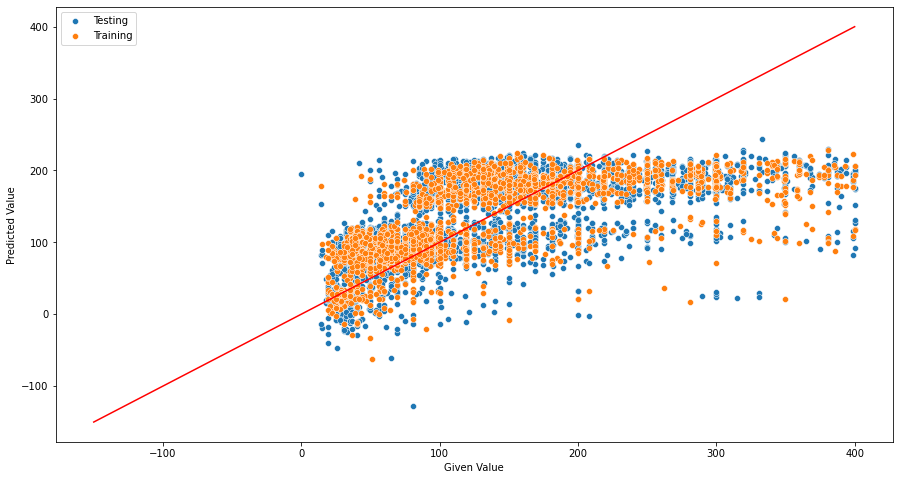

In [30]:
plt.figure(figsize=(15,8))

plot = sns.scatterplot(x=air_y_train, y=predictions_train, label='Testing')
plot = sns.scatterplot(x=air_y_test, y=predictions_test, label='Training')
plot.set(xlabel='Given Value', ylabel='Predicted Value')
plot.legend

# generate and graph y = x line
x_plot = np.linspace(-150,400,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')



In [31]:
print("Linear Regression")
print('Training RMSE:', sqrt(mean_squared_error(predictions_train, air_y_train))) # RMSE: the lower the better
print('Training R^2 Value:', lm.score(air_x_train, air_y_train)) # R squared value (ranges from 0 to 1): the higher the better

print("")

print('Testing RMSE:', sqrt(mean_squared_error(predictions_test, air_y_test))) # RMSE: the lower the better
print('Testing R^2 Value:', lm.score(air_x_test, air_y_test)) # R squared value (ranges from 0 to 1): the higher the better

Linear Regression
Training RMSE: 64.59348728994219
Training R^2 Value: 0.42699267141290687

Testing RMSE: 66.97908337181511
Testing R^2 Value: 0.41853545750217047


In [59]:
# Artificial Neural Network

In [33]:
mlpRegression = MLPRegressor(activation ='relu', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'adam', random_state=2)
mlpRegression.fit(air_x_train, air_y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=2)

In [34]:
y_train_predict = mlpRegression.predict(air_x_train)
y_test_predict = mlpRegression.predict(air_x_test)

In [64]:
# Predict w MSE = Lower value = Lower mean error / Regression
# Score = R^2, Higher value = Higher % of data fits the model / Classification
print("Artificial Neural Network")
print('Training R2 Value:', mlpRegression.score(air_x_train, air_y_train))
print('Testing R2 Value:', mlpRegression.score(air_x_test, air_y_test))

print("")


print('Training RMSE:', sqrt(mean_squared_error(y_train_predict, air_y_train))) # RMSE: the lower the better
print('Testing RMSE:', sqrt(mean_squared_error(y_test_predict, air_y_test))) # RMSE: the lower the better



Artificial Neural Network
Training R2 Value: 0.44463458900259833
Testing R2 Value: 0.4252928339488251

Training RMSE: 63.5913518667489
Testing RMSE: 66.58875386511066


In [66]:
print('Linear Regression')
print('Training R^2 Value:', lm.score(air_x_train, air_y_train))
print('Testing R^2 Value:', lm.score(air_x_test, air_y_test))

print('')

print('Training RMSE:', sqrt(mean_squared_error(predictions_train, air_y_train)))
print('Testing RMSE:', sqrt(mean_squared_error(predictions_test, air_y_test)))

print('')

print('Artificial Neural Network')
print('Training R^2 Value:', mlpRegression.score(air_x_train, air_y_train))
print('Testing R^2 Value:', mlpRegression.score(air_x_test, air_y_test))

print('')

print('Training RMSE:', sqrt(mean_squared_error(y_train_predict, air_y_train)))
print('Testing RMSE:', sqrt(mean_squared_error(y_test_predict, air_y_test)))


Linear Regression
Training R^2 Value: 0.42699267141290687
Testing R^2 Value: 0.41853545750217047

Training RMSE: 64.59348728994219
Testing RMSE: 66.97908337181511

Artificial Neural Network
Training R^2 Value: 0.44463458900259833
Testing R^2 Value: 0.4252928339488251

Training RMSE: 63.5913518667489
Testing RMSE: 66.58875386511066


### 2.3 Evaluate and Improve the Model(s)

In [23]:
# Linear Regression

In [46]:
modelAir = XGBRegressor(objective='reg:squarederror', missing=None, seed=42)
modelAir.fit(air_x_train, air_y_train)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [66]:
# Artificial Neural Network

In [67]:
param_grid1 = {"activation": ["logistic", "relu"], "hidden_layer_sizes" : [(5,), (10,), (20,)], "max_iter" : [200, 1000,3000], 'solver' : ["sgd", "adam"]}

airGS = GridSearchCV(mlpRegression, param_grid=param_grid1, cv=10, n_jobs=-1)

airGS = airGS.fit(air_x_train, air_y_train) 

print(airGS.best_score_)
print(airGS.best_params_)

0.441022834715407
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'max_iter': 3000, 'solver': 'adam'}


In [47]:
mlpRegression_Improved = MLPRegressor(activation ='logistic', hidden_layer_sizes=(20,), max_iter= 3000, solver = 'adam', random_state=2)
mlpRegression_Improved.fit(air_x_train, air_y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(20,), max_iter=3000,
             random_state=2)

In [48]:
y_train_predict_Improved = mlpRegression_Improved.predict(air_x_train)
y_test_predict_Improved = mlpRegression_Improved.predict(air_x_test)

In [65]:
print('Linear Regression')
print('Training R^2 Value:', lm.score(air_x_train, air_y_train), 'Improved Training R^2 Value:', modelAir.score(air_x_train, air_y_train))
print('Testing R^2 Value:', lm.score(air_x_test, air_y_test), '\tImproved Testing R^2 Value:', modelAir.score(air_x_test, air_y_test))

print('')

print('Training RMSE:', sqrt(mean_squared_error(predictions_train, air_y_train)), '\tImproved Training RSME: ', sqrt(mean_squared_error(air_y_train, predTrain)))
print('Testing RMSE:', sqrt(mean_squared_error(predictions_test, air_y_test)), '\tImproved Testing RSME: ', sqrt(mean_squared_error(air_y_test, predTest)))

print('')

print('Artificial Neural Network')
print('Training R^2 Value:', mlpRegression.score(air_x_train, air_y_train), 'Improved Training R^2 Value:', mlpRegression_Improved.score(air_x_train, air_y_train))
print('Testing R^2 Value:', mlpRegression.score(air_x_test, air_y_test), '\tImproved Testing R^2 Value:', mlpRegression_Improved.score(air_x_test, air_y_test))

print('')

print('Training RMSE:', sqrt(mean_squared_error(y_train_predict, air_y_train)), '\tImproved Training RMSE:', sqrt(mean_squared_error(y_train_predict_Improved, air_y_train)))
print('Testing RMSE:', sqrt(mean_squared_error(y_test_predict, air_y_test)), '\tImproved Testing RMSE:', sqrt(mean_squared_error(y_test_predict_Improved, air_y_test)))


Linear Regression
Training R^2 Value: 0.42699267141290687 Improved Training R^2 Value: 0.9158500465377585
Testing R^2 Value: 0.41853545750217047 	Improved Testing R^2 Value: 0.6155251349594035

Training RMSE: 64.59348728994219 	Improved Training RSME:  24.753441263988524
Testing RMSE: 66.97908337181511 	Improved Testing RSME:  54.46425381833304

Artificial Neural Network
Training R^2 Value: 0.44463458900259833 Improved Training R^2 Value: 0.4467801759209954
Testing R^2 Value: 0.4252928339488251 	Improved Testing R^2 Value: 0.4241333007739424

Training RMSE: 63.5913518667489 	Improved Training RMSE: 63.46839425563875
Testing RMSE: 66.58875386511066 	Improved Testing RMSE: 66.6558949825158
